In [1]:
from unyt import ms, hour
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import h5py as h5
#look at ICs
IC_file = '/cosma7/data/dp004/dc-kott1/PK-ICs/swift/vol03_lp1_swift'
h = h5.File(IC_file,'r') #read hdf5 file
pos = h['PartType1/Coordinates']

#fig, ax = plt.subplots()
#ax.plot(pos[::250,0],pos[::250,1],'k.', markersize=0.25, alpha=0.2)
#ax.set_ylim(30,31)
#ax.set_xlim(113, 113.2)
#fig.show()

In [19]:
import swiftsimio as sw
#loc = '/cosma7/data/dp004/dc-kott1/vol03_lp1_results/snapshots/'
loc = '/cosma7/data/dp004/dc-kott1/swift/vol03_m5_zoom_1node/'
data = sw.load(loc+'snapshot_0046.hdf5') #read final snapshot

#check boxsize, particle number, and redshift

print('Boxsize:')
print(data.metadata.boxsize)

print('Particle numbers:')
print(data.metadata.n_dark_matter)

print('Redshift:')
print(data.metadata.redshift)

pos = data.dark_matter.coordinates

Could not find gas gamma, assuming 5./3.
Boxsize:
[400.00000019 400.00000019 400.00000019] Mpc
Particle numbers:
203682930
Redshift:
4.054661934020247


In [4]:
jem_loc = '/cosma8/data/dp004/dc-brig2/Columba/HYDRO/m5/volume03/'
jem_data = sw.load(jem_loc+'snapshot_0063.hdf5') #read final snapshot

#check boxsize, particle number, and redshift

print('Boxsize:')
print(jem_data.metadata.boxsize)

print('Particle numbers:')
print(jem_data.metadata.n_dark_matter)

print('Redshift:')
print(jem_data.metadata.redshift)

jem_pos = jem_data.dark_matter.coordinates

Boxsize:
[400.00000019 400.00000019 400.00000019] Mpc
Particle numbers:
22909172
Redshift:
2.220446049250313e-16


In [23]:
import sys

sys.path.append('/cosma/home/dp004/azadehf/PROJECT/auriga/readers/')
from readers_auriga import readsubfind_auriga
from readers_auriga import readsnap_auriga



path = '/cosma7/data/dp004/dc-kott1/arepo_results/vol03_lp1_512mesh/output'
snaptar = 46     #snapshot number
h_param = 0.681   #hubble parameter


#reading halo/subhalo catalogue
#FirstSubhalo = readsubfind_auriga(snaptar, 'GroupFirstSub', dataset='Group', indir=path)
#m200         = readsubfind_auriga(snaptar, 'Group_M_Crit200', dataset='Group', indir=path)
#subhalopos   = readsubfind_auriga(snaptar, 'SubhaloPos',    dataset='Subhalo', indir=path)

#converting units
#m200 *= 1e10/h_param       #in solar masses
#subhalopos *= 1e3/h_param  #in kpc



#reading particle
ptype=1    #dark matter particle type
coord_dm = readsnap_auriga (snaptar, 'Coordinates', ptype,   indir=path)

#coord_dm *= 1e3/h_param     #in kpc

TotNparticles of type 1: 203682930


/cosma/home/dp004/azadehf/PROJECT/auriga/readers/readers_auriga.py:115: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  tmp = f['/'+varname].value


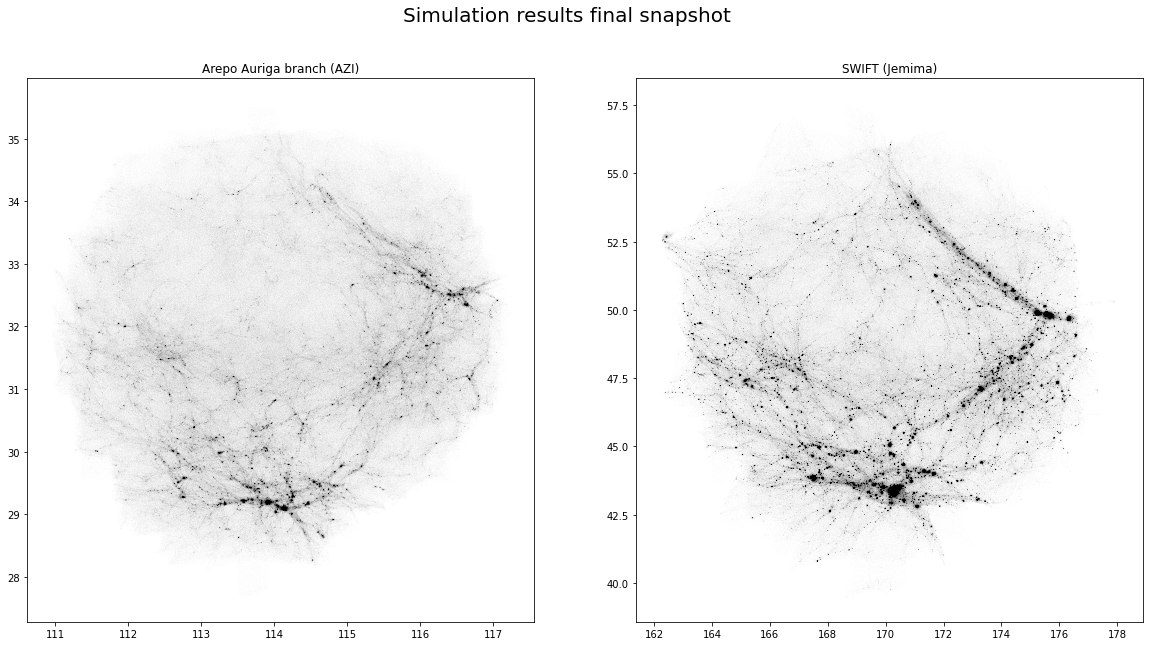

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
#ax[0].plot(pos[::50,0],pos[::50,1],'k.',markersize=0.25,alpha=0.01)
#ax[0].set_title('SWIFT')
#ax[0].set_ylim(195, 212)
#ax[0].set_xlim(195, 212)
ax[0].plot(coord_dm[::50,0], coord_dm[::50,1],'k.', markersize=0.25, alpha=0.01)
ax[0].set_title('Arepo Auriga branch (AZI)')
ax[1].plot(jem_pos[::5,0], jem_pos[::5,1],'k.', markersize=0.25, alpha=0.01)
ax[1].set_title('SWIFT (Jemima)')

fig.suptitle('Simulation results final snapshot', fontsize=20)
plt.show()

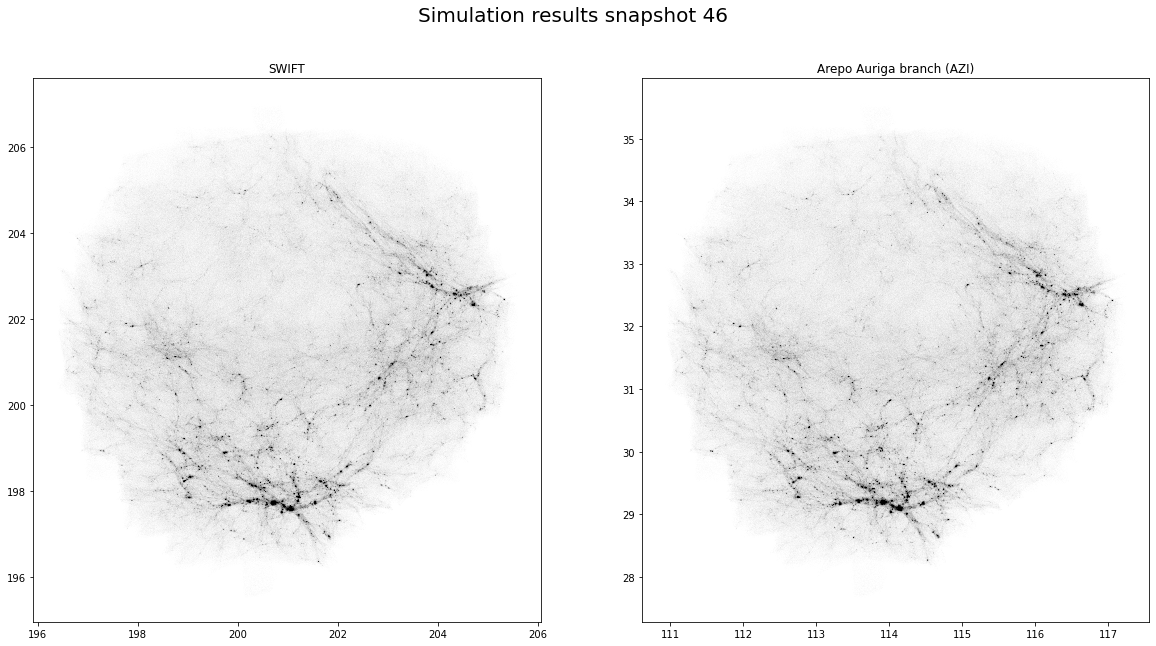

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(pos[::50,0],pos[::50,1],'k.',markersize=0.25,alpha=0.01)
ax[0].set_title('SWIFT')
#ax[0].set_ylim(195, 212)
#ax[0].set_xlim(195, 212)
ax[1].plot(coord_dm[::50,0], coord_dm[::50,1],'k.', markersize=0.25, alpha=0.01)
ax[1].set_title('Arepo Auriga branch (AZI)')

fig.suptitle('Simulation results snapshot 46', fontsize=20)
plt.show()

In [8]:
PK_H, swift_yedges, swift_xedges = np.histogram2d(pos[:,1], pos[:,0], bins=300)
arepo_H, arepo_yedges, arepo_xedges = np.histogram2d(coord_dm[:,1], coord_dm[:,0], bins=300)

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


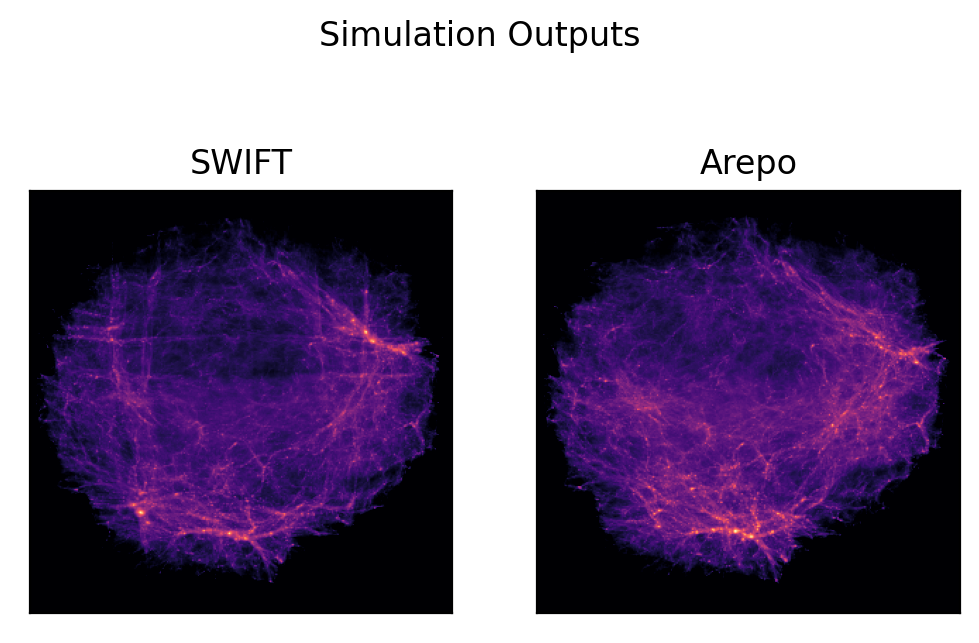

In [9]:
swift_log_H = np.where(PK_H != 0, np.log(PK_H), 1)
arepo_log_H = np.where(arepo_H != 0, np.log(arepo_H), 1)

fig, (ax1, ax2) = plt.subplots(ncols=2, dpi = 200)
im1 = ax1.imshow(swift_log_H, origin='lower', cmap = 'magma', vmin = 7)
im2 = ax2.imshow(arepo_log_H, origin='lower', cmap = 'magma', vmin = 7)
#fig.colorbar(im1)
#ax1.set_xlabel('x')
#ax1.set_ylabel('y')
#plt.colorbar(im1)
for ax in (ax1, ax2):
    ax.set_xticks([])
    ax.set_yticks([])
ax1.set_title('SWIFT')
ax2.set_title('Arepo')
fig.suptitle('Simulation Outputs')
fig.show()